In [2]:
import pandas as pd

In [24]:
df = pd.read_csv('./data/sp500_20Y_with_covid.csv')
df.reindex(index=df.index[::-1])

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-02-22,1346.089966,1358.109985,1331.880005,1352.170044,1352.170044,980000000
1,2000-02-23,1352.170044,1370.109985,1342.439941,1360.689941,1360.689941,993700000
2,2000-02-24,1360.689941,1364.800049,1329.880005,1353.430054,1353.430054,1215000000
3,2000-02-25,1353.430054,1362.140015,1329.150024,1333.359985,1333.359985,1065200000
4,2000-02-28,1333.359985,1360.819946,1325.069946,1348.050049,1348.050049,1026500000
5,2000-02-29,1348.050049,1369.630005,1348.050049,1366.420044,1366.420044,1204300000
6,2000-03-01,1366.420044,1383.459961,1366.420044,1379.189941,1379.189941,1274100000
7,2000-03-02,1379.189941,1386.560059,1370.349976,1381.760010,1381.760010,1198600000
8,2000-03-03,1381.760010,1410.880005,1381.760010,1409.170044,1409.170044,1150300000
9,2000-03-06,1409.170044,1409.739990,1384.750000,1391.280029,1391.280029,1029000000


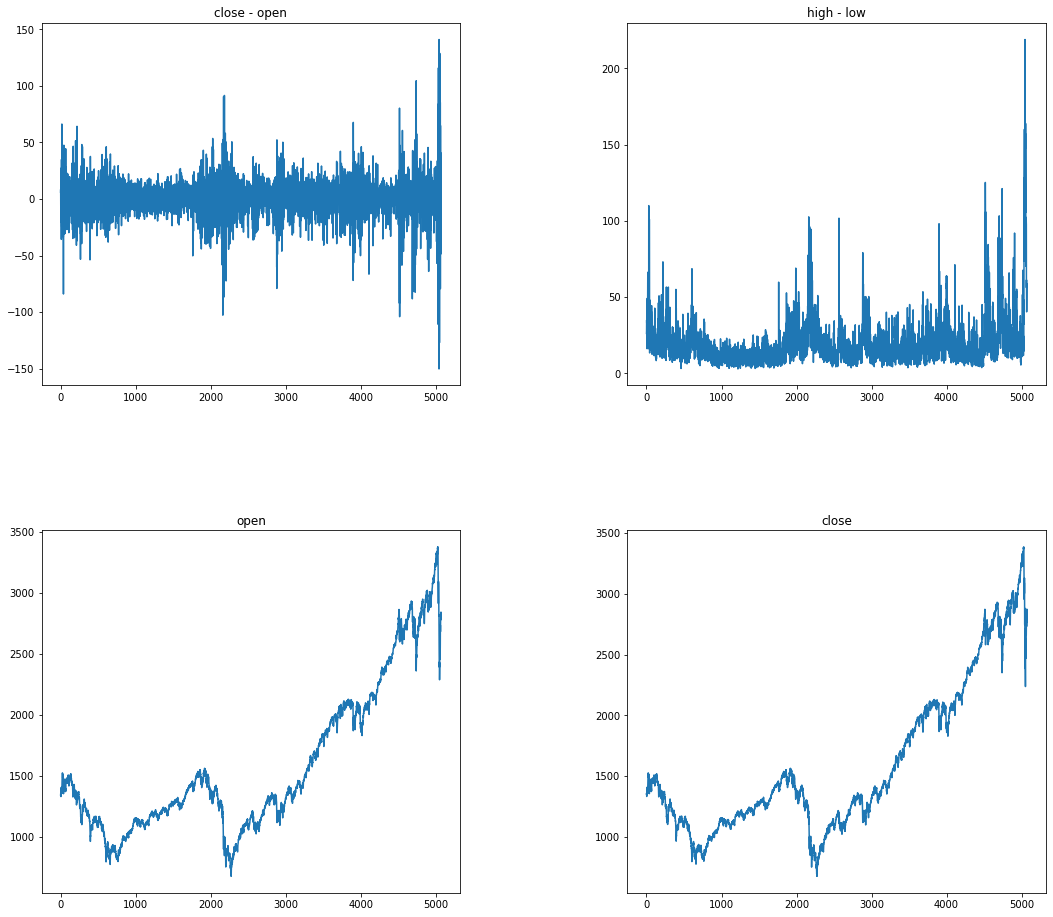

In [26]:
import matplotlib.pyplot as plt

def plotting_differences(dataframe_slice):

    fig = plt.figure(figsize=(18, 16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(2, 2, 1)
    plt.title('close - open')
    plt.plot(df['Close'] - df['Open'])

    plt.subplot(2, 2, 2)
    plt.title('high - low')
    plt.plot(df['High'] - df['Low'])

    plt.subplot(2, 2, 3)
    plt.title('open')
    plt.plot(df['Open'])
    
    plt.subplot(2, 2, 4)
    plt.title('close')
    
    plt.plot(df['Close'])
    
plotting_differences(df)

In [54]:
def split_df(dataframe, chunk_len, step=1):
    return [dataframe[x-chunk_len:x] for x in range(chunk_len, len(df), step)]

chunks = split_df(df, 30)
chunks = list(map(lambda x: x.reset_index(), chunks))

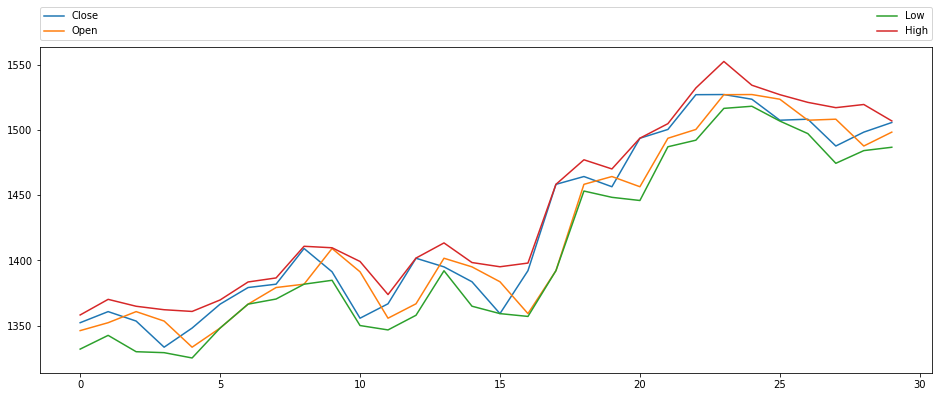

In [65]:
def plot_chunk(chunk):
    fig = plt.figure(figsize=(16, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.plot(chunk['Close'], label='Close')
    plt.plot(chunk['Open'], label='Open')
    plt.plot(chunk['Low'], label='Low')
    plt.plot(chunk['High'], label='High')
    
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
    
plot_chunk(chunks[0])